In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

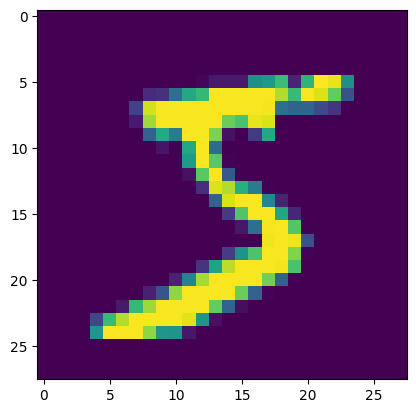

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
plt.imshow(X_train[0])


X_train = X_train / 255.0
X_test = X_test / 255.0

In [3]:
# Reshape for CNN
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [4]:
# One Hot Encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [5]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(X_train)

In [6]:
# CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1), strides=(1,1),padding='same',),
    MaxPooling2D(2,2),
    Dropout(0.25),
    Conv2D(64, (3,3),strides=(1,1),padding='same', activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.25),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
Dense(10, activation='softmax')

])

c:\Users\Admin\anaconda3\envs\dl_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Compile
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
   metrics=['accuracy']
)

In [8]:
# Early Stopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3
)

In [9]:
# Train
history = model.fit(
    datagen.flow(X_train,y_train,batch_size=64),
    epochs=15,
    validation_data=(X_test,y_test),
    callbacks=[early_stop]
)

Epoch 1/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 37s 36ms/step - accuracy: 0.8199 - loss: 0.5513 - val_accuracy: 0.9817 - val_loss: 0.0553
Epoch 2/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 45ms/step - accuracy: 0.9397 - loss: 0.2061 - val_accuracy: 0.9890 - val_loss: 0.0336
Epoch 3/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 50s 53ms/step - accuracy: 0.9550 - loss: 0.1552 - val_accuracy: 0.9912 - val_loss: 0.0265
Epoch 4/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 50s 53ms/step - accuracy: 0.9605 - loss: 0.1364 - val_accuracy: 0.9919 - val_loss: 0.0228
Epoch 5/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 47s 50ms/step - accuracy: 0.9655 - loss: 0.1214 - val_accuracy: 0.9930 - val_loss: 0.0204
Epoch 6/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 47s 50ms/step - accuracy: 0.9691 - loss: 0.1114 - val_accuracy: 0.9923 - val_loss: 0.0211
Epoch 7/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 46s 49ms/step - accuracy: 0.9708 - loss: 0.1042 - val_accuracy: 0.9926 - val_loss: 0.0197
Epoch 8/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 52s 56ms/step - accuracy: 0.9731 - loss: 0.0971 - 

In [10]:
# Evaluate
loss, acc = model.evaluate(X_test,y_test)
print("\nFinal Accuracy:", acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9934 - loss: 0.0183

Final Accuracy: 0.993399977684021


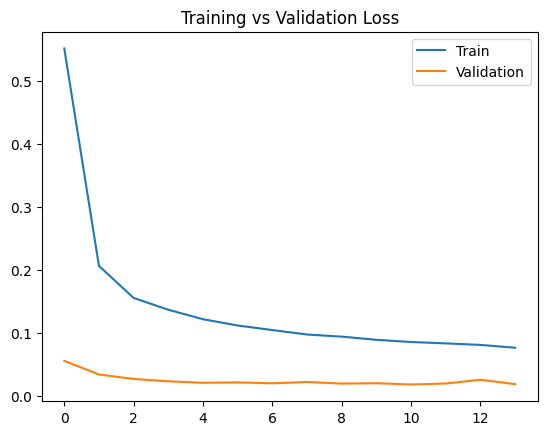

In [11]:
# Plot Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Training vs Validation Loss")
plt.legend(["Train","Validation"])
plt.show()

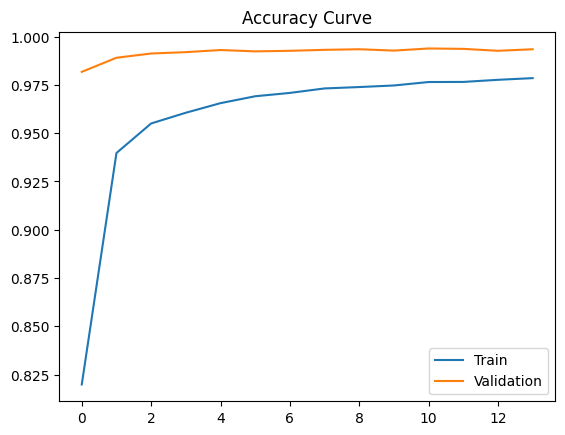

In [12]:
# PLOT ACCURACY
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy Curve")
plt.legend(["Train","Validation"])
plt.show()